Group 15 - Section #2
Playing around

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('COVID-19BehaviorData_CAN_USA.csv', na_values = [' '])

In [3]:
df.head()

,Index,RecordNo,endtime,qweek,i1_health,i2_health,i7a_health,i3_health,i4_health,i5_health_1,...,d1_health_13,d1_health_98,d1_health_99,weight,gender,age,region_state,household_size,household_children,employment_status
0,0,CAN0,02/04/2020 08:25,week 1,0,1,1,"No, I have not","No, they have not",No,...,No,No,No,1.036370,Male,73,British Columbia / Colombie Britanique,1,0,Retired
1,1,CAN1,02/04/2020 08:34,week 1,0,6,0,"No, I have not","No, they have not",Yes,...,No,No,Yes,1.016961,Female,37,British Columbia / Colombie Britanique,1,0,Unemployed
2,2,CAN2,02/04/2020 08:44,week 1,6,1,0,"No, I have not","No, they have not",No,...,No,No,No,1.003516,Male,25,Ontario,8 or more,2,Full time employment
3,3,CAN3,02/04/2020 08:44,week 1,1,1,1,"No, I have not","No, they have not",No,...,No,No,No,1.002949,Male,66,Ontario,2,0,Retired
4,4,CAN4,02/04/2020 09:00,week 1,1,3,1,"No, I have not","No, they have not",No,...,No,No,Yes,1.028216,Female,25,British Columbia / Colombie Britanique,2,0,Unemployed


In [4]:
#check data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28825 entries, 0 to 28824
Data columns (total 79 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Index               28825 non-null  int64  
 1   RecordNo            28825 non-null  object 
 2   endtime             28825 non-null  object 
 3   qweek               28825 non-null  object 
 4   i1_health           28825 non-null  int64  
 5   i2_health           28825 non-null  int64  
 6   i7a_health          28825 non-null  int64  
 7   i3_health           28420 non-null  object 
 8   i4_health           27968 non-null  object 
 9   i5_health_1         28106 non-null  object 
 10  i5_health_2         28106 non-null  object 
 11  i5_health_3         28106 non-null  object 
 12  i5_health_4         28106 non-null  object 
 13  i5_health_5         28106 non-null  object 
 14  i5_health_99        28106 non-null  object 
 15  i5a_health          2606 non-null   object 
 16  i6_h

In [5]:
#see how many nulls - lots of missing values
sum(df.isna().sum(axis = 'rows'))

410954

In [6]:
df['i8_health']

0        NaN
1         No
2         No
3        NaN
4        NaN
        ... 
28820    NaN
28821    NaN
28822    NaN
28823    NaN
28824    NaN
Name: i8_health, Length: 28825, dtype: object

In [7]:
#get a list of all columns that are object
#https://www.skytowner.com/explore/converting_all_object_typed_columns_to_categorical_type_in_pandas_dataframe
df_obj_columns = df.columns[df.dtypes == "object"].tolist()

In [8]:
#convert object to categories
for col_name in df_obj_columns:
    if (col_name != 'RecordNo') and (col_name != 'region_state') and (col_name != 'endtime'):
        df[col_name] = df[col_name].astype("category")

In [9]:
#convert endtime to date
df['endtime'] = pd.to_datetime(df['endtime'])

In [10]:
# declaring dictionaries for types of data sets
yes_no = {"No": 0, "Yes": 1}
yes_no_notsure = {"Yes": 1, "No": 2, "Not sure": 99}
frequency = {"Always": 1, "Frequently": 2, "Sometimes": 3, "Rarely": 4, "Not at all": 5}
easily = {"Very easy": 1, "Somewhat easy": 2, "Neither easy nor difficult": 3, "Somewhat difficult": 4, "Very difficult": 5, "Not sure": 99}
willingness = {"Very willing": 1, "Somewhat willing": 2, "Neither willing nor unwilling": 3, "Somewhat unwilling": 4, "Very unwilling": 5, "Not sure": 99}
employment = {"Full time employment": 1, "Part time employment": 2, "Full time student": 3, "Retired": 4, "Unemployed": 5, "Not working": 6, "Other": 7}
gender = {"Male": 1, "Female": 2}
household_size = {"1": 1, "2" : 2, "3" : 3, "4": 4, "5": 5, "6": 6, "7": 7, "8 or more": 8, "Don't know": 9, "Prefer not to say": 10}
household_children = {"0": 1, "1": 2, "2": 3, "3": 4, "4": 5, "5 or more": 6, "Prefer not to say": 8}

In [11]:
dict_list = [yes_no] + [yes_no_notsure] + [frequency] + [easily] + [willingness] + [employment] + [gender] + [household_size] + [household_children]

In [12]:
df['i8_health'].cat.categories

Index(['No', 'Not sure', 'Yes'], dtype='object')

In [13]:
#iterate through columns and assign the recode each column to numeric
#get a list of category columns
df_cat_columns = df.columns[df.dtypes == 'category'].tolist()

In [14]:
df2 = df.copy(deep=True)
for col in df_cat_columns:
    #get categories of the list
    cat_list = df[col].cat.categories.tolist()
    
    # iterate through each dictionary for mapping
    for dict_map in dict_list:
        # set the counter equal to zero
        count = 0
        for cat_map in cat_list:
            #iterate through each category for that column and check to see if it is in the dictionary
            #if it is then increase count by 1
            if cat_map in dict_map.keys():
                count = count + 1
        
        #compare the count against the length of the dictionary, if they are the same then we found the dictionary of interest
        if count == len(dict_map):
            #recode the variable for that column using the dictionary
            df2[col] = df[col].replace(list(dict_map.keys()), list(dict_map.values()))

In [15]:
df2.head()

,Index,RecordNo,endtime,qweek,i1_health,i2_health,i7a_health,i3_health,i4_health,i5_health_1,...,d1_health_13,d1_health_98,d1_health_99,weight,gender,age,region_state,household_size,household_children,employment_status
0,0,CAN0,2020-02-04 08:25:00,week 1,0,1,1,"No, I have not","No, they have not",0.0,...,0.0,0.0,0.0,1.036370,1,73,British Columbia / Colombie Britanique,1,1,4
1,1,CAN1,2020-02-04 08:34:00,week 1,0,6,0,"No, I have not","No, they have not",1.0,...,0.0,0.0,1.0,1.016961,2,37,British Columbia / Colombie Britanique,1,1,5
2,2,CAN2,2020-02-04 08:44:00,week 1,6,1,0,"No, I have not","No, they have not",0.0,...,0.0,0.0,0.0,1.003516,1,25,Ontario,8,3,1
3,3,CAN3,2020-02-04 08:44:00,week 1,1,1,1,"No, I have not","No, they have not",0.0,...,0.0,0.0,0.0,1.002949,1,66,Ontario,2,1,4
4,4,CAN4,2020-02-04 09:00:00,week 1,1,3,1,"No, I have not","No, they have not",0.0,...,0.0,0.0,1.0,1.028216,2,25,British Columbia / Colombie Britanique,2,1,5


In [16]:
df.head()

,Index,RecordNo,endtime,qweek,i1_health,i2_health,i7a_health,i3_health,i4_health,i5_health_1,...,d1_health_13,d1_health_98,d1_health_99,weight,gender,age,region_state,household_size,household_children,employment_status
0,0,CAN0,2020-02-04 08:25:00,week 1,0,1,1,"No, I have not","No, they have not",No,...,No,No,No,1.036370,Male,73,British Columbia / Colombie Britanique,1,0,Retired
1,1,CAN1,2020-02-04 08:34:00,week 1,0,6,0,"No, I have not","No, they have not",Yes,...,No,No,Yes,1.016961,Female,37,British Columbia / Colombie Britanique,1,0,Unemployed
2,2,CAN2,2020-02-04 08:44:00,week 1,6,1,0,"No, I have not","No, they have not",No,...,No,No,No,1.003516,Male,25,Ontario,8 or more,2,Full time employment
3,3,CAN3,2020-02-04 08:44:00,week 1,1,1,1,"No, I have not","No, they have not",No,...,No,No,No,1.002949,Male,66,Ontario,2,0,Retired
4,4,CAN4,2020-02-04 09:00:00,week 1,1,3,1,"No, I have not","No, they have not",No,...,No,No,Yes,1.028216,Female,25,British Columbia / Colombie Britanique,2,0,Unemployed


In [53]:
# check some columns to make sure the replace happened properly
df['i5_health_1'].value_counts()

No     26800
Yes     1306
Name: i5_health_1, dtype: int64

In [54]:
df2['i5_health_1'].value_counts()

0.0    26800
1.0     1306
Name: i5_health_1, dtype: int64

In [55]:
df['i5a_health'].value_counts()

No          1501
Yes          557
Not sure     548
Name: i5a_health, dtype: int64

In [56]:
df2['i5a_health'].value_counts()

2.0     1501
1.0      557
99.0     548
Name: i5a_health, dtype: int64

In [57]:
df['i6_health'].value_counts()

Always        907
Frequently    757
Not at all    409
Sometimes     365
Rarely        168
Name: i6_health, dtype: int64

In [58]:
df2['i6_health'].value_counts()

1.0    907
2.0    757
5.0    409
3.0    365
4.0    168
Name: i6_health, dtype: int64

In [59]:
df['i10_health'].value_counts()

Very easy                     11467
Somewhat easy                  7182
Somewhat difficult             2801
Neither easy nor difficult     2762
Very difficult                 1489
Not sure                       1193
Name: i10_health, dtype: int64

In [60]:
df2['i10_health'].value_counts()

1.0     11467
2.0      7182
4.0      2801
3.0      2762
5.0      1489
99.0     1193
Name: i10_health, dtype: int64

In [61]:
df['gender'].value_counts()

Female    15703
Male      13122
Name: gender, dtype: int64

In [62]:
df2['gender'].value_counts()

2    15703
1    13122
Name: gender, dtype: int64

In [63]:
df['i14_health_10'].value_counts()

No     11879
Yes      281
Name: i14_health_10, dtype: int64

In [64]:
df2['i14_health_10'].value_counts()

0.0    11879
1.0      281
Name: i14_health_10, dtype: int64

<AxesSubplot:xlabel='country', ylabel='count'>

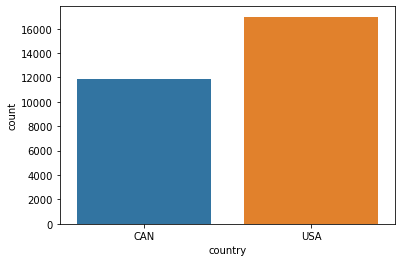

In [68]:
#good mix between Canada and US
df2['country'] = df2['RecordNo'].str[:3]
df['country'] = df2['RecordNo'].str[:3]
sns.countplot(df2['country'])

<AxesSubplot:xlabel='country,None'>

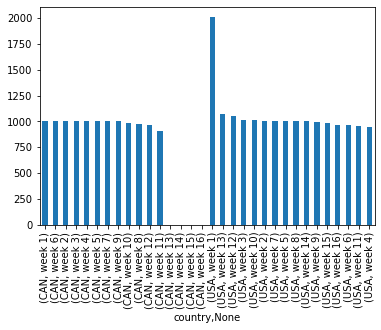

In [51]:
df2.groupby(['country'])['qweek'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='country,None'>

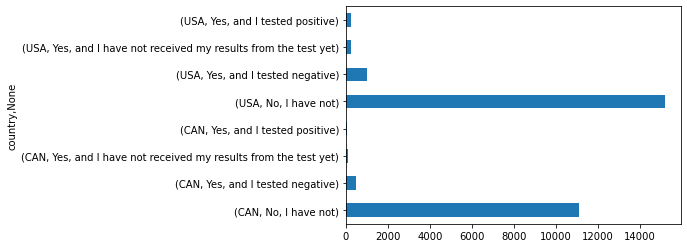

In [48]:
df2.groupby(['country'])['i3_health'].value_counts().plot(kind='barh')

No, they have not                                                  24392
Yes, and they tested negative                                       1644
Not sure                                                            1317
Yes, and they have not received their results from the test yet      396
Yes, and they tested positive                                        219
Name: i4_health, dtype: int64

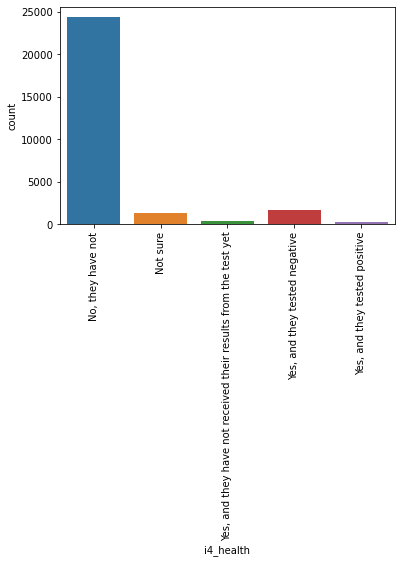

In [102]:
sns.countplot(df2['i4_health'])
plt.xticks(rotation = 90)
df2['i4_health'].value_counts()

No, I have not                                               26284
Yes, and I tested negative                                    1515
Yes, and I have not received my results from the test yet      341
Yes, and I tested positive                                     280
Name: i3_health, dtype: int64

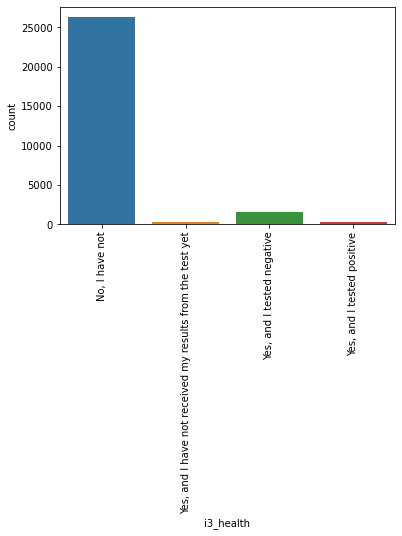

In [103]:
sns.countplot(df2['i3_health'])
plt.xticks(rotation = 90)
df2['i3_health'].value_counts()

In [69]:
#whether someone has been in contact with someone with covid
df.groupby(['country'])['i5a_health'].value_counts()

country          
CAN      No          586
         Not sure    197
         Yes         113
USA      No          915
         Yes         444
         Not sure    351
Name: i5a_health, dtype: int64

In [72]:
df['state_province'] = df['region_state'].str.split('/').str[0]
df2['state_province'] = df2['region_state'].str.split('/').str[0]

<AxesSubplot:>

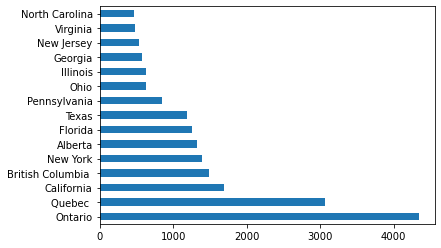

In [77]:
# there are provinces / states that are more represented than others - each of these provinces states would have different
# covid numbers
df['state_province'].value_counts().head(15).plot(kind = 'barh')

<AxesSubplot:>

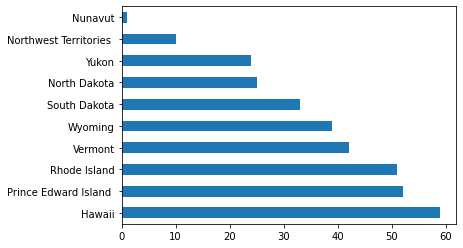

In [78]:
df['state_province'].value_counts().tail(10).plot(kind = 'barh')

country
CAN    AxesSubplot(0.125,0.125;0.775x0.755)
USA    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

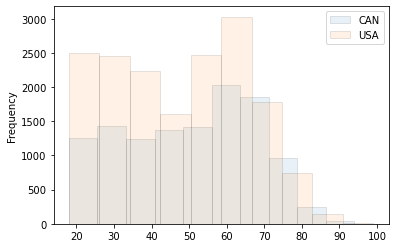

In [85]:
#no one under the age of 20, not too much difference in age categories, but more older people took this questionnaire
df.groupby(['country'])['age'].plot(kind='hist', alpha = 0.1, legend = True, edgecolor = 'black')

No     26800
Yes     1306
Name: i5_health_1, dtype: int64

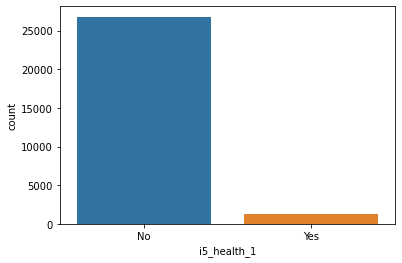

In [87]:
# do you have a cough
sns.countplot(df['i5_health_1'])
df['i5_health_1'].value_counts()

No     27647
Yes      459
Name: i5_health_2, dtype: int64

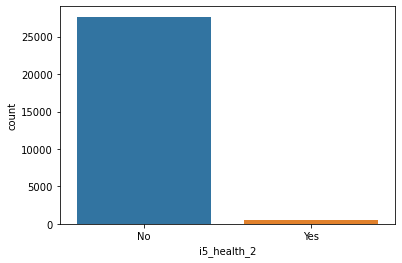

In [88]:
# do you have a fever
sns.countplot(df['i5_health_2'])
df['i5_health_2'].value_counts()

No     27650
Yes      456
Name: i5_health_3, dtype: int64

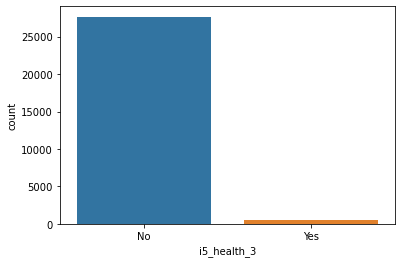

In [89]:
# do you have loss of sense of smell
sns.countplot(df['i5_health_3'])
df['i5_health_3'].value_counts()

No     27679
Yes      427
Name: i5_health_4, dtype: int64

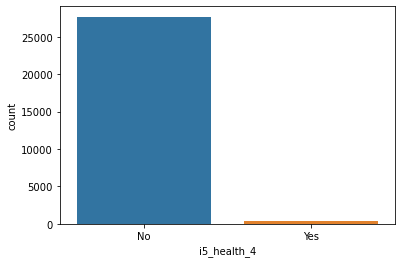

In [90]:
# do you have loss of taste
sns.countplot(df['i5_health_4'])
df['i5_health_4'].value_counts()

No     27192
Yes      914
Name: i5_health_5, dtype: int64

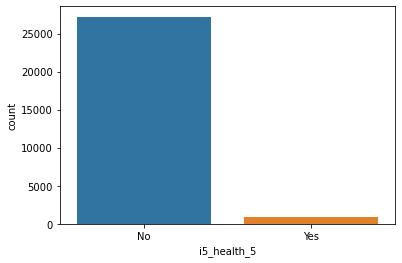

In [91]:
#do you have shortness of breath
sns.countplot(df['i5_health_5'])
df['i5_health_5'].value_counts()

Yes    25502
No      2604
Name: i5_health_99, dtype: int64

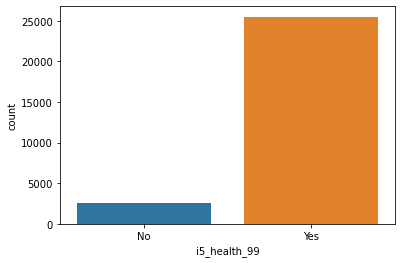

In [92]:
# no symptoms
sns.countplot(df['i5_health_99'])
df['i5_health_99'].value_counts()

Very easy                     11467
Somewhat easy                  7182
Somewhat difficult             2801
Neither easy nor difficult     2762
Very difficult                 1489
Not sure                       1193
Name: i10_health, dtype: int64

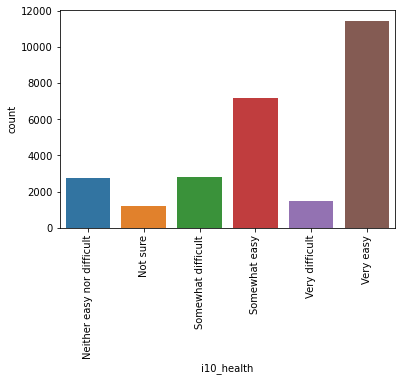

In [97]:
#how easy would it be to self-isolate
sns.countplot(df['i10_health'])
plt.xticks(rotation = 90)
df['i10_health'].value_counts()

Very willing                     17764
Somewhat willing                  4571
Neither willing nor unwilling     1910
Not sure                          1210
Somewhat unwilling                 807
Very unwilling                     632
Name: i11_health, dtype: int64

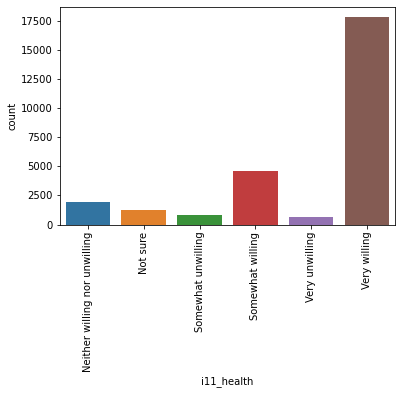

In [98]:
#how willing with you be to self-isolate
sns.countplot(df['i11_health'])
plt.xticks(rotation = 90)
df['i11_health'].value_counts()